In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.size

5016

In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Survival by Gender

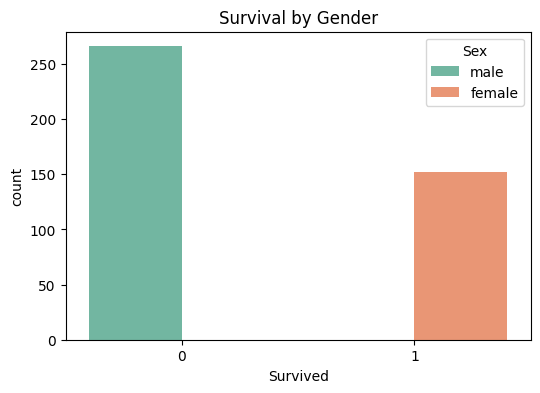

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.show()

Survival Counts

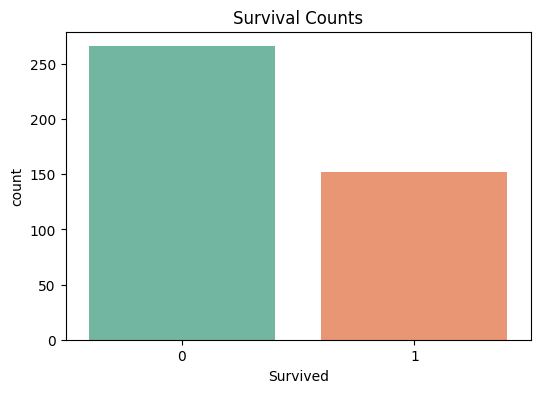

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Counts')
plt.show()

Survival by Passenger Class

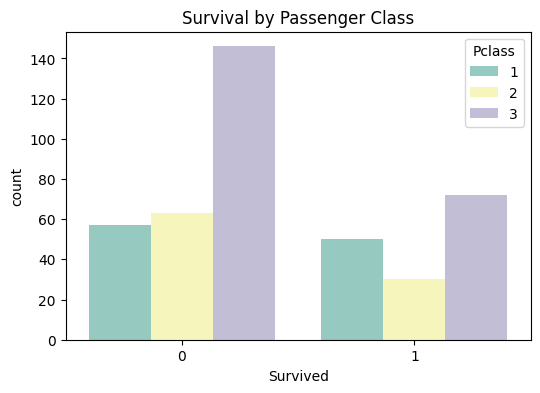

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()

Fare Distribution

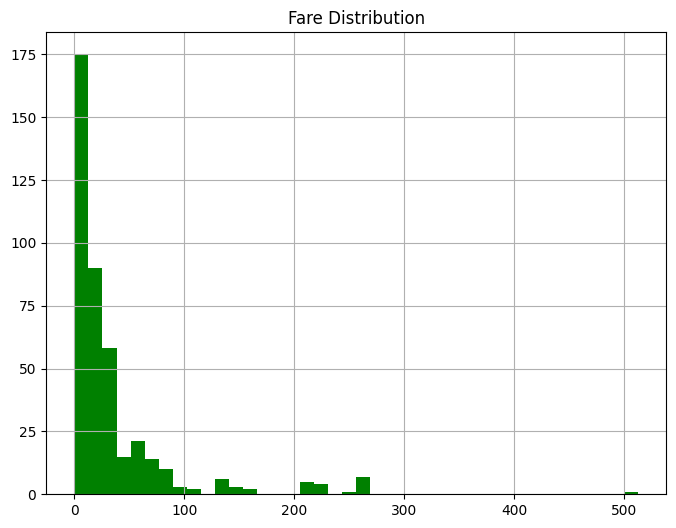

In [23]:
plt.figure(figsize=(8, 6))
df['Fare'].hist(color='green', bins=40)
plt.title('Fare Distribution')
plt.show()

Age Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


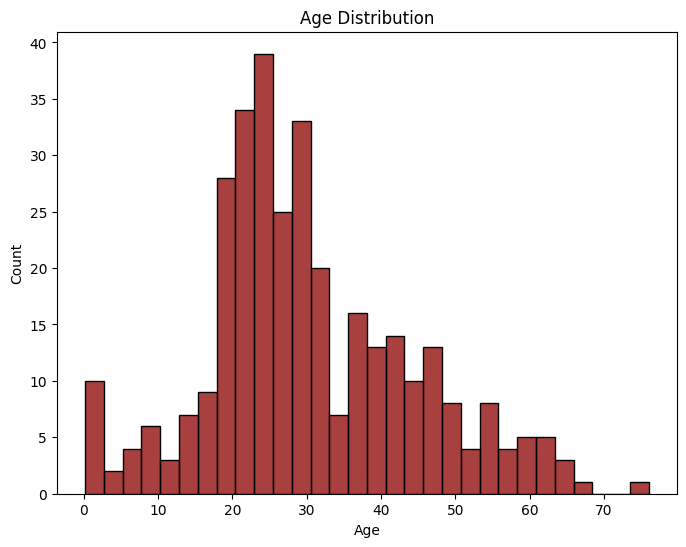

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=False, color='darkred', bins=30)
plt.title('Age Distribution')
plt.show()

Distribution of Siblings/Spouses Aboard

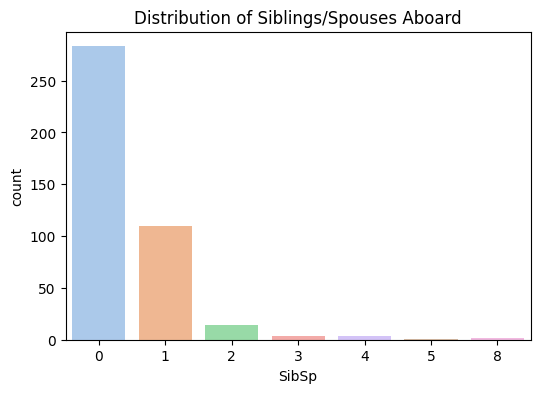

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', data=df, palette='pastel')
plt.title('Distribution of Siblings/Spouses Aboard')
plt.show()

Age Distribution by Passenger Class

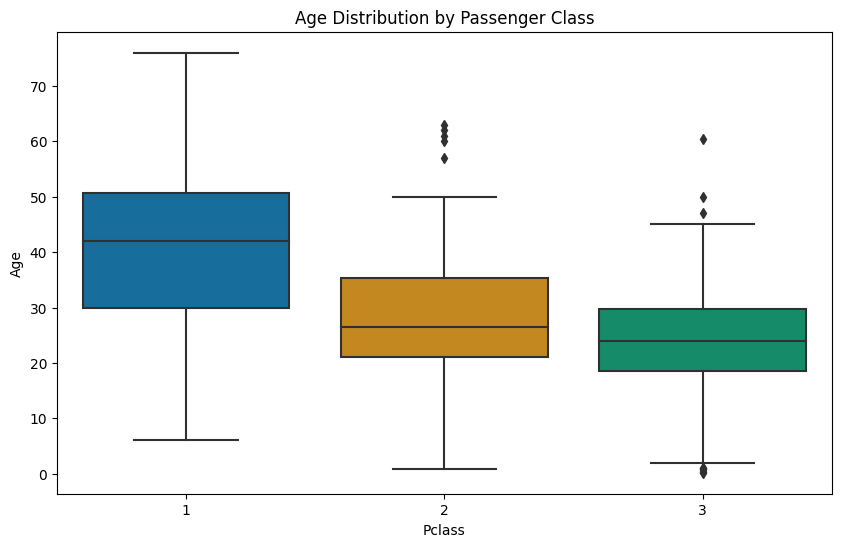

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='colorblind')
plt.title('Age Distribution by Passenger Class')
plt.show()

Filling Missing Age Values Based on Passenger Class

In [34]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)


Removing Unnecessary Columns

In [ ]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

**Encoding Categorical Variables**

In [39]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Embarked'] = df['Embarked'].fillna(method='ffill')


/tmp/ipykernel_33/4128199466.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'] = df['Embarked'].fillna(method='ffill')


Replace missing fare values with zeros

In [42]:
df['Fare'] = df['Fare'].fillna(0)

**Splitting the Data into Train and Test Sets**

In [43]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Training the Model**

In [46]:
model = XGBClassifier(n_estimators=70, max_depth=10, learning_rate=0.1, subsample=0.9, colsample_bytree=0.9)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Predictions**

In [49]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [51]:
report = '''
Classification Report:
{}
'''.format(classification_report(y_test, predictions))
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126




**The Confusion Matrix**

In [54]:
confusion_mat = confusion_matrix(y_test, predictions)
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[71  0]
 [ 0 55]]


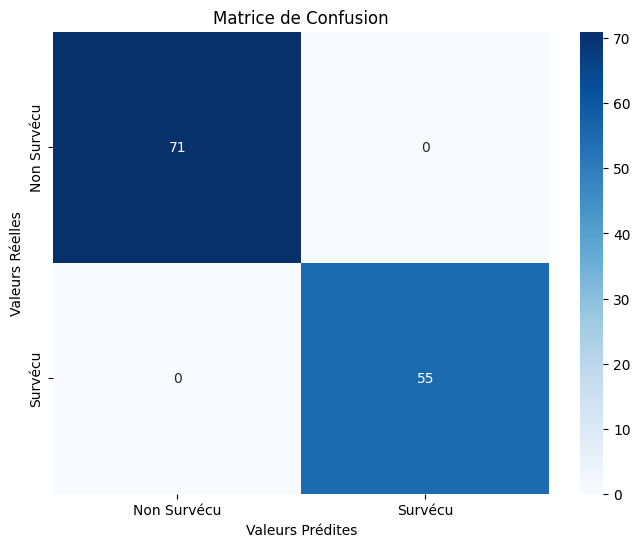

In [56]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", 
            xticklabels=["Non Survécu", "Survécu"], 
            yticklabels=["Non Survécu", "Survécu"])
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()